In [1]:
import koreanize_matplotlib
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

/tmp/ipykernel_13547/3961791937.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


데이터베이스에서 수집 및 정리된 데이터 가져오기

In [2]:
db = mysql.connector.Connect(
    host='database-1.cls80ok4wdvh.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='min',
    password='addinedu1234!',
    database='OliveYoung'
)

In [3]:
cur = db.cursor(buffered=True)

In [7]:
def base_to_df(table_name):
    # 테이블에서 데이터 가져오기
    cur.execute(f'SELECT * FROM {table_name}')
    result = cur.fetchall()
    # 컬럼 이름 가져오기
    cur.execute(f'DESC {table_name}')
    column_info = cur.fetchall()
    column_names = [col[0] for col in column_info]
    # DataFrame 생성 및 컬럼 이름 설정
    df = pd.DataFrame(result, columns=column_names)
    return df

In [8]:
cream_df = base_to_df('cream')
cream_df.head()

,브랜드명,제품명,원가,세일가,평점 갯수,평점,건성,복합성,지성,보습,진정,주름/미백,자극x,보통,자극O,성분
0,토리든,토리든 다이브인 수딩크림 100ml 더블 한정 기획,42000,27930,10707,4.8,32,50,18,65,35,1,79,21,1,"정제수,부틸렌글라이콜,글리세린,1,2-헥산다이올,하이드로제네이티드다이데센,알란토인,..."
1,에스네이처,에스네이처 아쿠아 스쿠알란 수분크림 60ml 더블 어워즈 한정기획,43000,23500,15902,4.8,36,53,11,79,19,2,78,22,1,"정제수,스쿠알란,글리세린,1,2-헥산다이올,베타인,판테놀,소듐하이알루로네이트,하이드..."
2,라로슈포제,라로슈포제 NEW 시카플라스트 밤B5+ 100ml 기획,39000,33150,12588,4.8,46,49,5,46,52,2,72,26,2,정제수하이드로제네이티드폴리아이소부텐다이메티콘글리세린시어버터판테놀옥수수전분프로판다이올...
3,피지오겔,피지오겔 DMT 페이셜 크림 200ml 대용량 한정기획,47500,29900,5931,4.8,52,44,4,75,25,0,73,27,0,"정제수,카프릴릭/카프릭트리글리세라이드,글리세린,펜틸렌글라이콜,코코넛오일,하이드로제네..."
4,헤브블루,헤브블루 살몬 케어링 센텔라 크림 100ml,39900,22900,571,5.0,30,60,10,44,56,1,93,7,1,"병풀추출물,부틸렌글라이콜,글리세린,카프릴릭/카프릭트라이글리세라이드,하이드로제네이티드..."


In [9]:
db.close()

In [10]:
cream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   브랜드명    551 non-null    object 
 1   제품명     551 non-null    object 
 2   원가      551 non-null    int64  
 3   세일가     551 non-null    int64  
 4   평점 갯수   551 non-null    int64  
 5   평점      551 non-null    float64
 6   건성      551 non-null    int64  
 7   복합성     551 non-null    int64  
 8   지성      551 non-null    int64  
 9   보습      551 non-null    int64  
 10  진정      551 non-null    int64  
 11  주름/미백   551 non-null    int64  
 12  자극x     551 non-null    int64  
 13  보통      551 non-null    int64  
 14  자극O     551 non-null    int64  
 15  성분      551 non-null    object 
dtypes: float64(1), int64(12), object(3)
memory usage: 69.0+ KB


In [13]:
cream_df = cream_df.rename(columns={'평점 갯수':'평점수', '건성':'건성%', '지성':'지성%',
                                    '복합성':'복합성%', '보습':'보습%', '진정':'진정%',
                                    '주름/미백':'주름/미백%', '자극x':'저자극%', '보통':'보통%',
                                    '자극O':'자극적%'})

In [14]:
cream_df.head()

,브랜드명,제품명,원가,세일가,평점수,평점,건성%,복합성%,지성%,보습%,진정%,주름/미백%,저자극%,보통%,자극적%,성분
0,토리든,토리든 다이브인 수딩크림 100ml 더블 한정 기획,42000,27930,10707,4.8,32,50,18,65,35,1,79,21,1,"정제수,부틸렌글라이콜,글리세린,1,2-헥산다이올,하이드로제네이티드다이데센,알란토인,..."
1,에스네이처,에스네이처 아쿠아 스쿠알란 수분크림 60ml 더블 어워즈 한정기획,43000,23500,15902,4.8,36,53,11,79,19,2,78,22,1,"정제수,스쿠알란,글리세린,1,2-헥산다이올,베타인,판테놀,소듐하이알루로네이트,하이드..."
2,라로슈포제,라로슈포제 NEW 시카플라스트 밤B5+ 100ml 기획,39000,33150,12588,4.8,46,49,5,46,52,2,72,26,2,정제수하이드로제네이티드폴리아이소부텐다이메티콘글리세린시어버터판테놀옥수수전분프로판다이올...
3,피지오겔,피지오겔 DMT 페이셜 크림 200ml 대용량 한정기획,47500,29900,5931,4.8,52,44,4,75,25,0,73,27,0,"정제수,카프릴릭/카프릭트리글리세라이드,글리세린,펜틸렌글라이콜,코코넛오일,하이드로제네..."
4,헤브블루,헤브블루 살몬 케어링 센텔라 크림 100ml,39900,22900,571,5.0,30,60,10,44,56,1,93,7,1,"병풀추출물,부틸렌글라이콜,글리세린,카프릴릭/카프릭트라이글리세라이드,하이드로제네이티드..."


데이터의 신뢰성을 높이기 위해 평점수와 평점을 설정함

In [29]:
cream_df_r = cream_df[cream_df['평점수']>=300]
cream_df_r = cream_df_r[cream_df_r['평점']>=4]
len(cream_df_r)   #551 -> 281

281

평균보다 원가가 낮은 데이터를 추가적으로 생성함

In [16]:
cream_df_m = cream_df_r[cream_df_r['원가']<=29000]
len(cream_df_m)

88

브랜드 개수

/tmp/ipykernel_13547/625648554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cream_df_r['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)


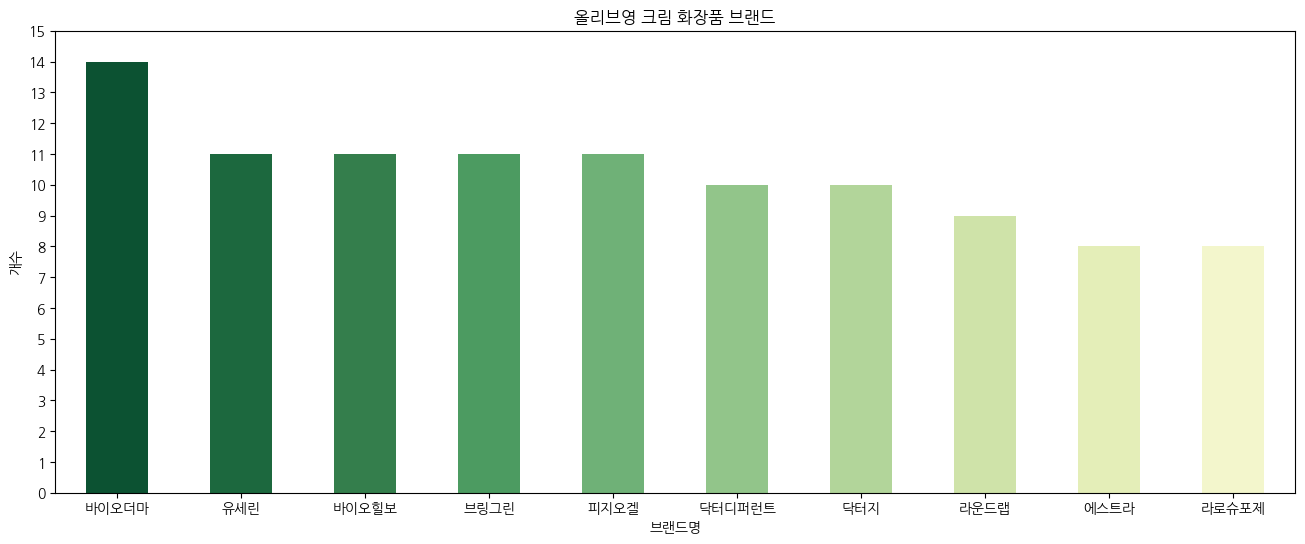

In [19]:
plt.figure(figsize=(16, 6))
sns.barplot(cream_df_r['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)
plt.title('올리브영 크림 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 16, 1));

/tmp/ipykernel_13547/3187282116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cream_df_m['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)


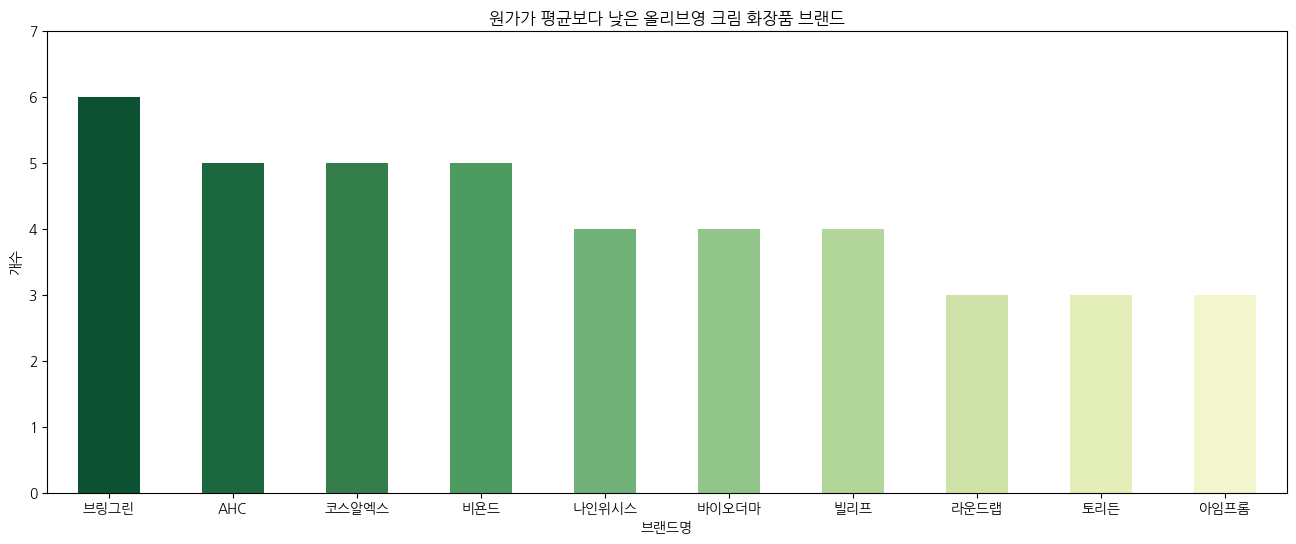

In [20]:
plt.figure(figsize=(16, 6))
sns.barplot(cream_df_m['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)
plt.title('원가가 평균보다 낮은 올리브영 크림 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 8, 1));

저자극

/tmp/ipykernel_13547/875052276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)


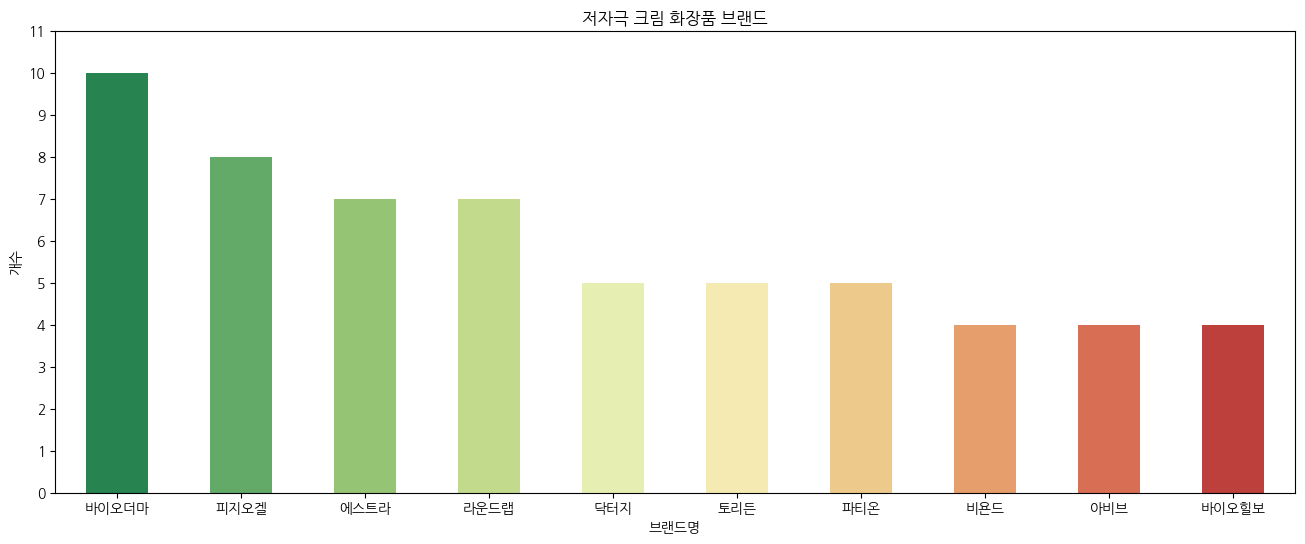

In [21]:
temp1 = cream_df_r[cream_df_r['저자극%']>=75].sort_values(by='저자극%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)
plt.title('저자극 크림 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 12, 1));


/tmp/ipykernel_13547/4174067970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)


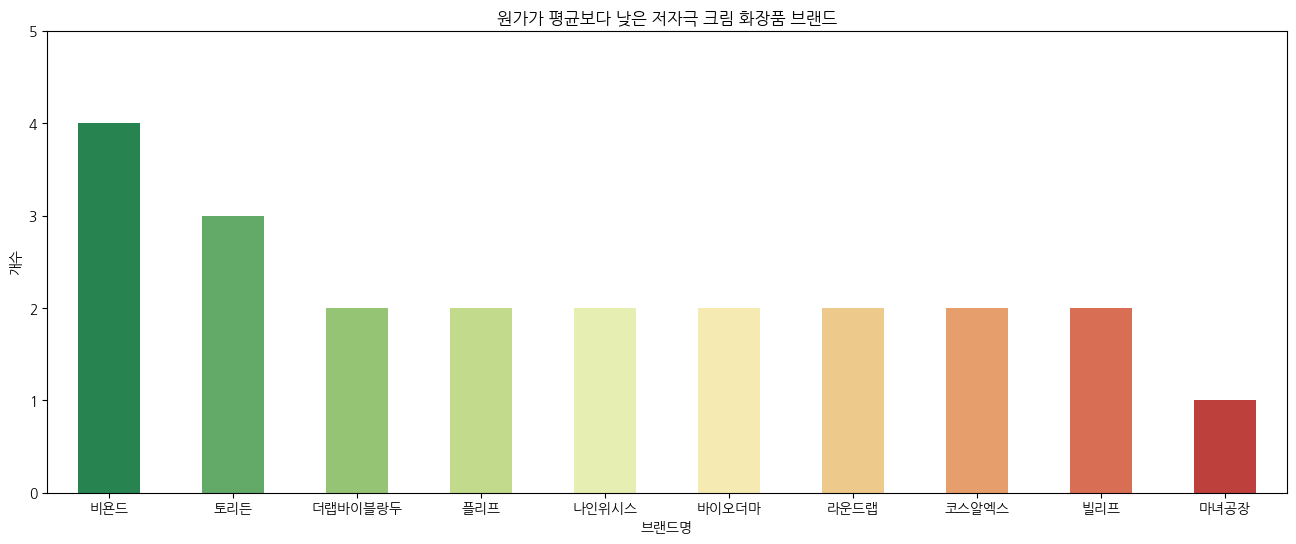

In [22]:
temp1 = cream_df_m[cream_df_m['저자극%']>=75].sort_values(by='저자극%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)
plt.title('원가가 평균보다 낮은 저자극 크림 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 6, 1));


보습

/tmp/ipykernel_13547/753742390.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)


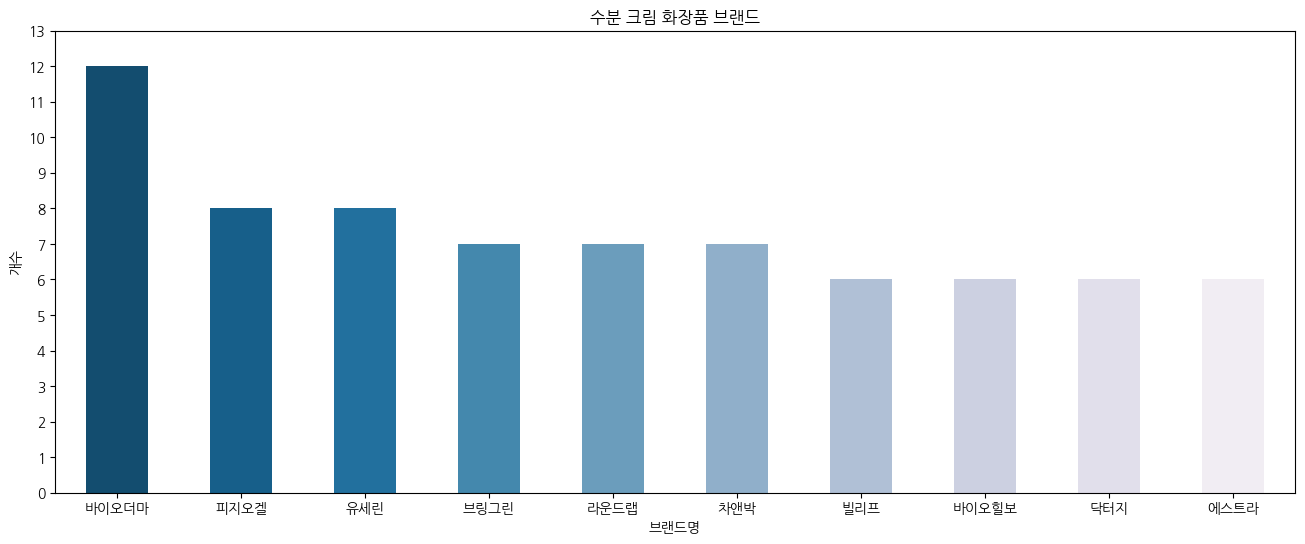

In [23]:
temp1 = cream_df_r[cream_df_r['보습%']>=47].sort_values(by='보습%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)
plt.title('수분 크림 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 14, 1));

/tmp/ipykernel_13547/4211610300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)


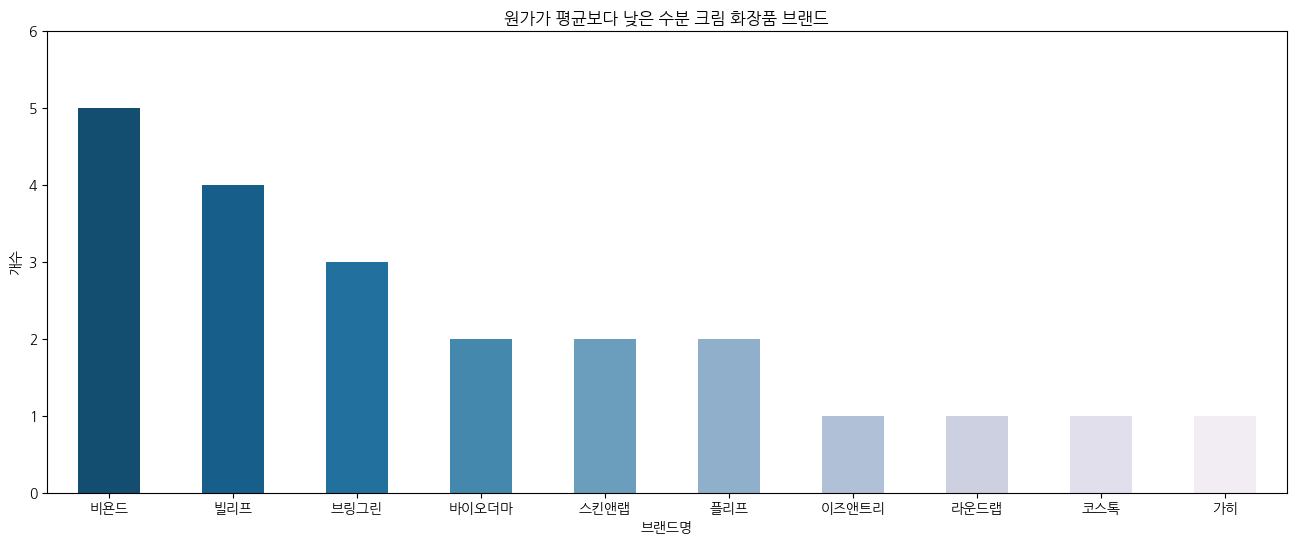

In [24]:
temp1 = cream_df_m[cream_df_m['보습%']>=47].sort_values(by='보습%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)
plt.title('원가가 평균보다 낮은 수분 크림 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 7, 1));

진정

/tmp/ipykernel_13547/2837279141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)


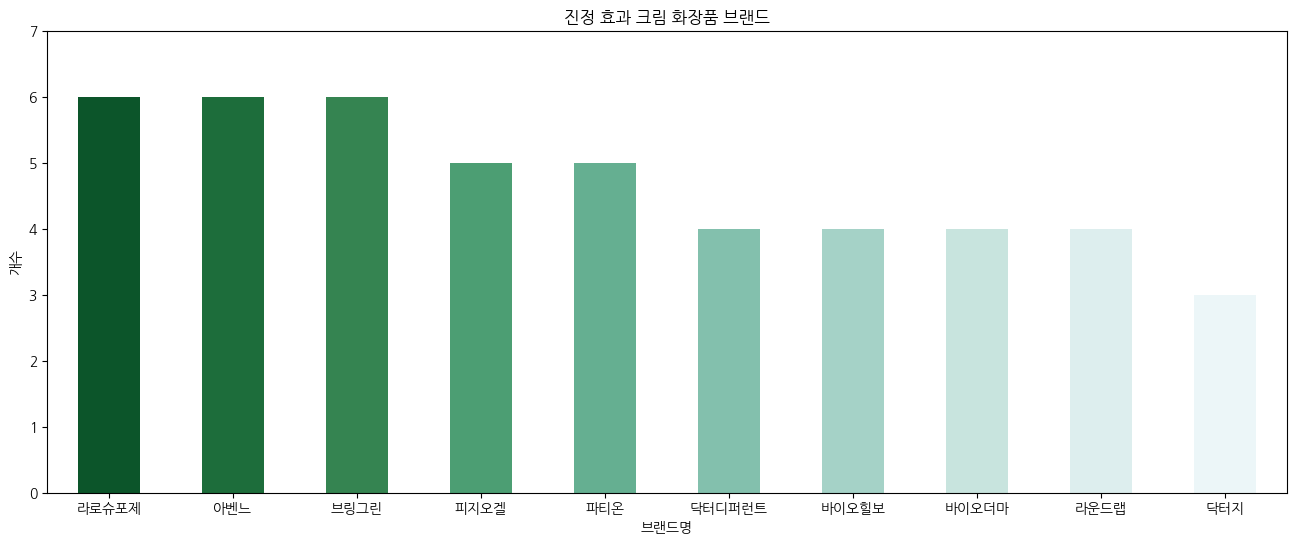

In [25]:
temp1 = cream_df_r[cream_df_r['진정%']>=39].sort_values(by='진정%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)
plt.title('진정 효과 크림 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 8, 1));

/tmp/ipykernel_13547/1017571465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)


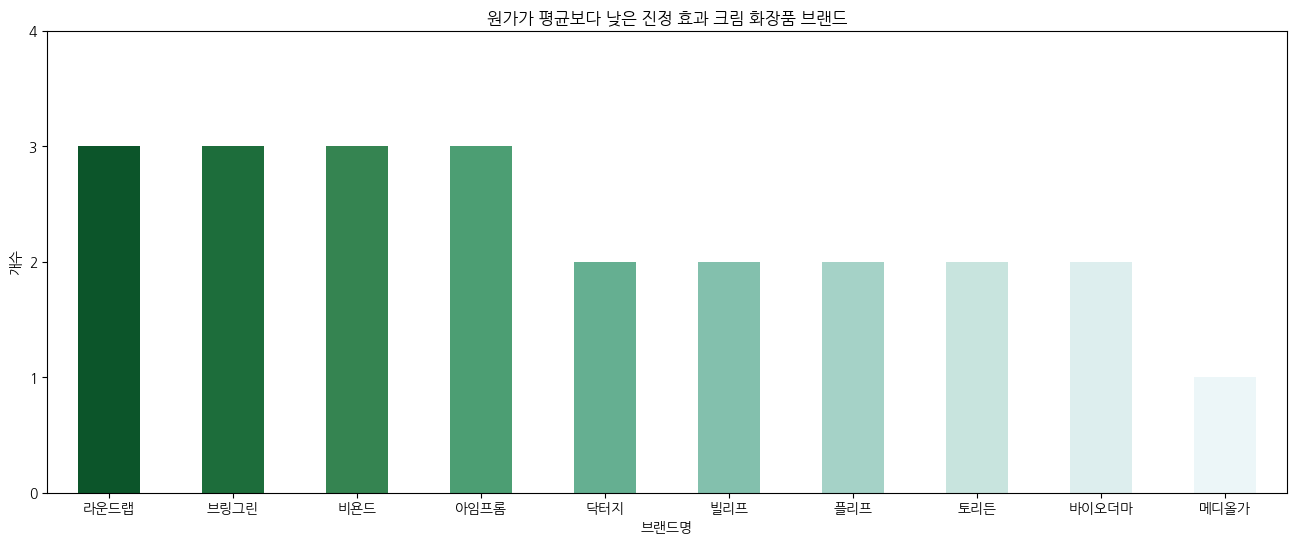

In [26]:
temp1 = cream_df_m[cream_df_m['진정%']>=39].sort_values(by='진정%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)
plt.title('원가가 평균보다 낮은 진정 효과 크림 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 5, 1));

주름/미백

/tmp/ipykernel_13547/3338624049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)


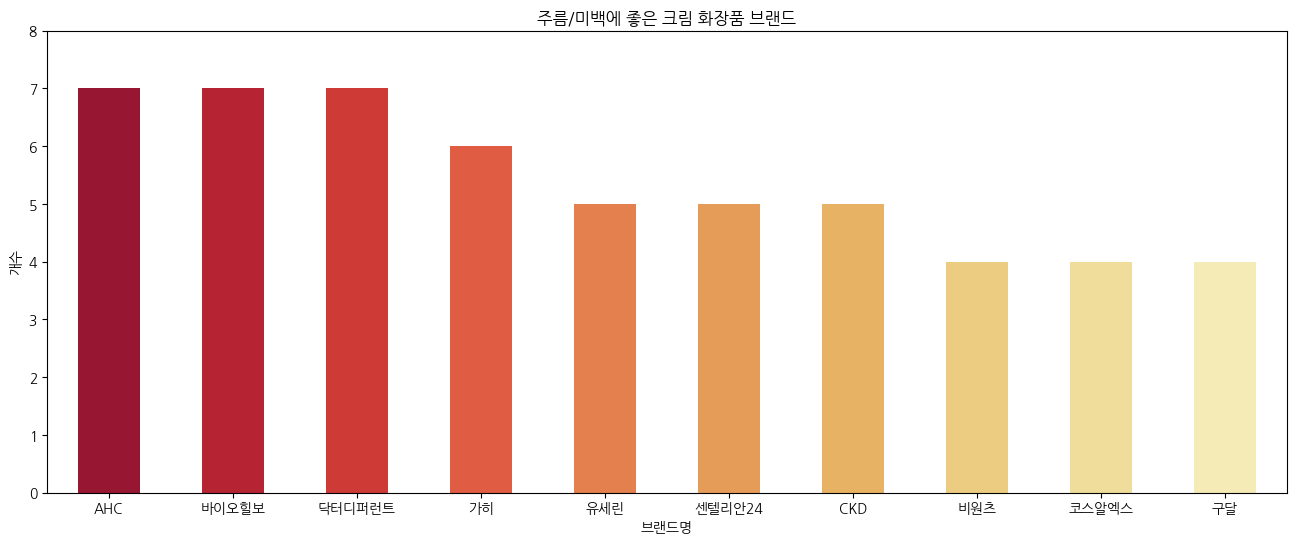

In [27]:
temp1 = cream_df_r[cream_df_r['주름/미백%']>16].sort_values(by='주름/미백%')

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)
plt.title('주름/미백에 좋은 크림 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 9, 1));

/tmp/ipykernel_13547/2102669649.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)


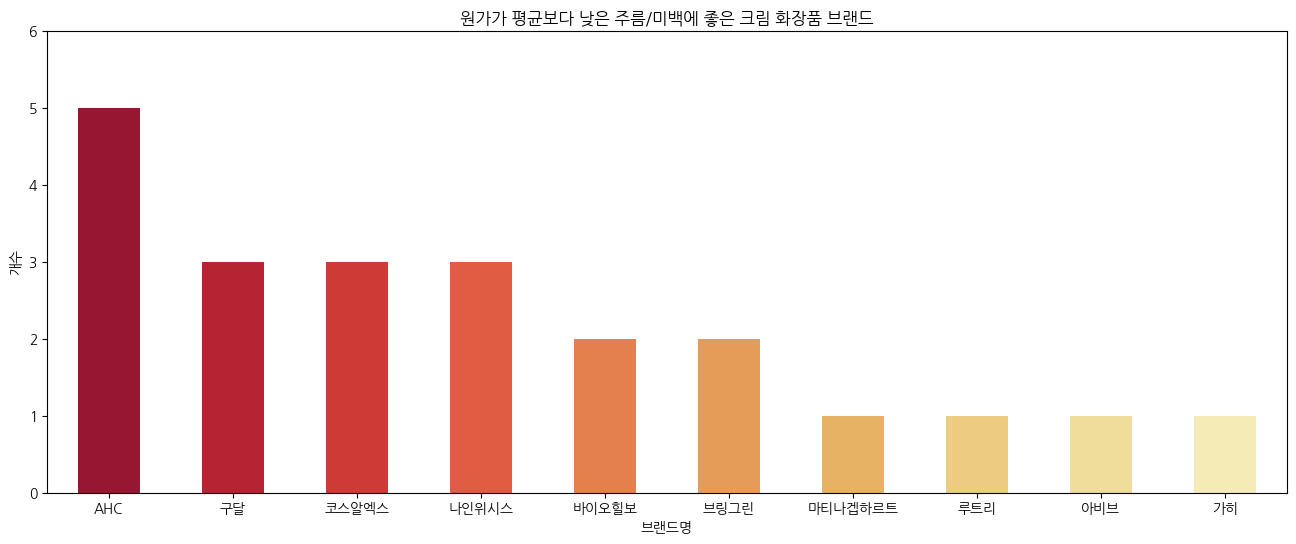

In [28]:
temp1 = cream_df_m[cream_df_m['주름/미백%']>16].sort_values(by='주름/미백%')

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)
plt.title('원가가 평균보다 낮은 주름/미백에 좋은 크림 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 7, 1));